<a href="https://colab.research.google.com/github/rajeshpahari/Deep-Learning/blob/main/Pytorch_Loss_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loss Fubction

In [1]:
#Import libraries
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

# # Mean square Error - MSE


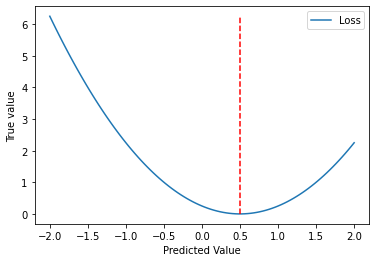

In [2]:

##Loss Function
lossMSE=nn.MSELoss()

##Create Predictions & real out put
yHat=torch.linspace(-2,2,101) ## Generating 101 dummey prediction
y=torch.tensor(.5)  # our True out put is same which is .5


##compute Loss of each 101 data points from true value .5
L=np.zeros(101)

for i,yy in enumerate(yHat):
  L[i]=lossMSE(yy,y)

##Show results
plt.plot(yHat,L,label='Loss')
plt.plot([y,y],[0,np.max(L)],'r--')
plt.ylabel('True value')
plt.xlabel('Predicted Value')
plt.legend()
plt.show();



# Binary Cross Entropy - BCE

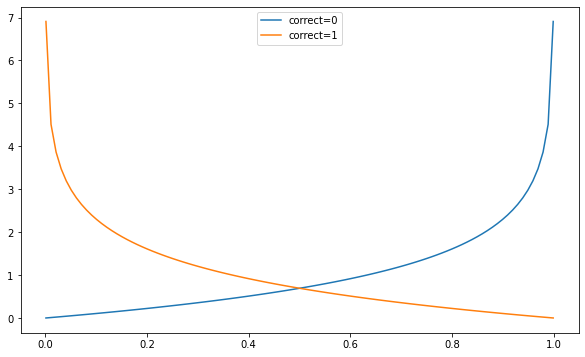

In [3]:
#Loss function
lossfunc=nn.BCELoss()

#Create prediction and real target
yHat=torch.linspace(.001,.999,101)
y1=torch.tensor(0.0)
y2=torch.tensor(1.0)

#Compute Loss for each prediction from real values
L=np.zeros((101,2)) #initializes Loss

for i,yy in enumerate(yHat):
  L[i,0]=lossfunc(yy,y1)
  L[i,1]=lossfunc(yy,y2)

plt.figure(figsize=(10,6))
plt.plot(yHat,L)
plt.xlabel='Prediction'
plt.ylabel='Loss'
plt.legend(['correct=0', 'correct=1'])
#plt.yscale('log')
plt.show();






#  Questions??

In [7]:

#What will happen if we want to calculate Loss of a data point 4.0 from y2 with BCELOSS function

yHat=torch.tensor(4.0)
# print(lossfunc(yHat,y2))

#Above code will throw an error as we are using Binary cross entropy ...which expects sigmoid results and expect input value from 0 to 1 only

#So we should first use sigmoid function and then apply BCloss
sig=nn.Sigmoid()
print(lossfunc(sig(yHat),y2))


tensor(0.0181)


#But in Pytorch recomendations is to use sigmoid+BCE>>BCEwithLogItLOss

In [8]:
lossfunc=nn.BCEWithLogitsLoss()
print(lossfunc(yHat,y2))

tensor(0.0181)


# Categorical Cross Entropy

In [9]:
#Loss function
lossfunc=nn.CrossEntropyLoss()

#predicted Values
yHat=torch.tensor([[1.0,4,3]])

for i in range(3):
  trueval=torch.tensor([i])
  loss=lossfunc(yHat,trueval).item()
  print(f'When True Value %g  The Loss is: %g: ' %(i,loss))

When True Value 0  The Loss is: 3.34901: 
When True Value 1  The Loss is: 0.349012: 
When True Value 2  The Loss is: 1.34901: 


In [11]:
# Repeat the same using pre-Softmaxified output
sm=nn.Softmax(dim=1)
yHat_sm=sm(yHat)


for i in range(3):
  trueval=torch.tensor([i])
  loss=lossfunc(yHat_sm,trueval).item()
  print(f'When True Value %g  The Loss is: %g: ' %(i,loss))

                       

When True Value 0  The Loss is: 1.43658: 
When True Value 1  The Loss is: 0.766318: 
When True Value 2  The Loss is: 1.21221: 


In [12]:
#Compare raw,softmax & log-softmax output

sm=nn.LogSoftmax(dim=1)
yHat_logsm=sm(yHat)


print(yHat)
print(yHat_sm)
print(yHat_logsm)


tensor([[1., 4., 3.]])
tensor([[0.0351, 0.7054, 0.2595]])
tensor([[-3.3490, -0.3490, -1.3490]])
